# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import cluster as ct
from sklearn import metrics as mt

# Load Dataset

In [98]:
X, y = ds.make_blobs(n_samples=100,
                     n_features=2,
                     centers=10,
                     cluster_std=0.5,
                     random_state=0)

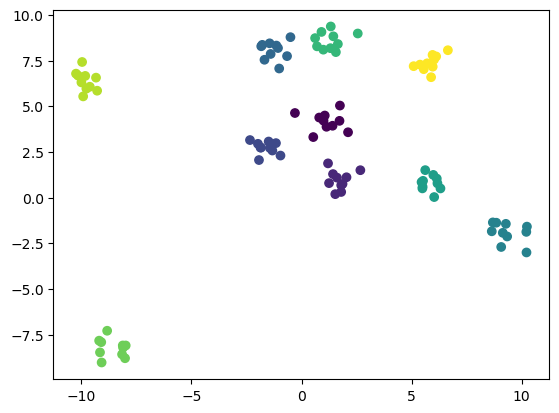

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y);

# Training K-Means

In [106]:
clusters = np.arange(2, 20, 1)

df = pd.DataFrame()

for k in clusters:
    silhouettes = np.array([])
    perc_errors = np.array([])
    for i in range(1000):
        model = ct.KMeans(n_clusters=k,
                          init='random',
                          n_init=10
                        )#random_state=0

        y_pred = model.fit_predict(X)
        
        perc_errors = np.append(perc_errors, sum(y_pred == y) / len(y))
        silhouettes = np.append(silhouettes, mt.silhouette_score(X, y_pred))
    df1 = pd.DataFrame({'k': [k],
                        'silhouette': [silhouettes.mean()],
                        'perc_ok': [perc_errors.mean()]})
    df = pd.concat([df, df1], axis=0)

In [107]:
df

,k,silhouette,perc_ok
0,2,0.548562,0.10000
0,3,0.452247,0.10248
0,4,0.566014,0.10027
0,5,0.608652,0.09790
0,6,0.677261,0.10332
0,7,0.682484,0.10004
0,8,0.697227,0.10505
0,9,0.724514,0.09955
0,10,0.729130,0.10612
0,11,0.712979,0.08615


O melhor valor para k é: 3.


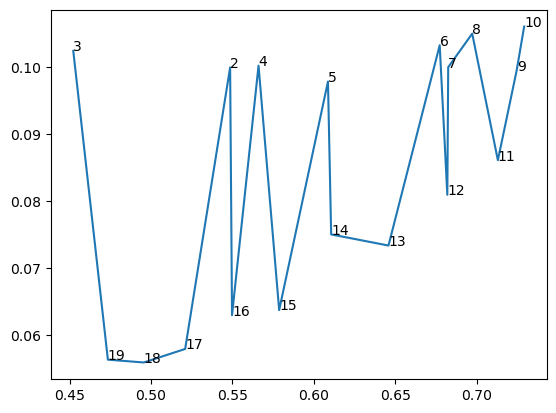

In [109]:
df = df.sort_values('silhouette').reset_index(drop=True)

best_k = df.loc[0, 'k']
print(f'O melhor valor para k é: {best_k}.')

plt.plot(df['silhouette'], df['perc_ok']);
for i in range(len(df['silhouette'])):
    plt.text(df.loc[i, 'silhouette'], df.loc[i, 'perc_ok'], df.loc[i, 'k'] )

# Fine Tunnning

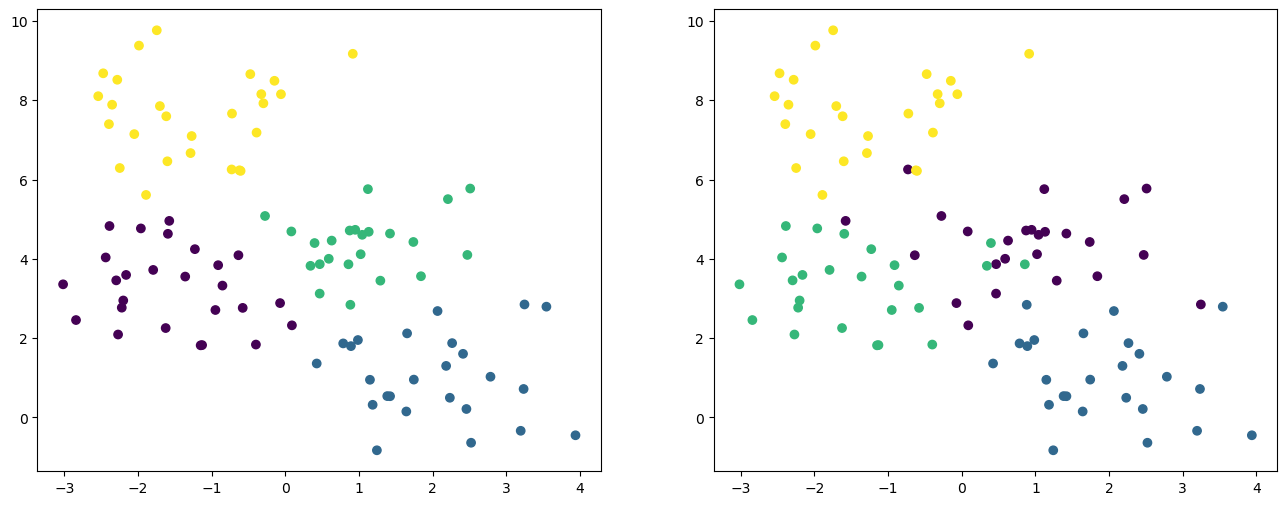

In [34]:
model = ct.KMeans(n_clusters=best_k,
                  init='random',
                  n_init=10,
                  random_state=0)

y_pred = model.fit_predict(X)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y);